# Práctica 7

Generar una red neuronal con pytorch sobre los datos del dataset GTZAN

Dataset: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/code?datasetId=568973&sortBy=voteCount

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargamos los datos
df = pd.read_csv('gtzan/features_30_sec.csv')

## Visualizamos los datos

In [3]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [4]:
df.shape

(1000, 60)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

De los datos anteriores podemos observar que el dataset cuenta con 1000 filas y 60 columnas.

59 columnas son los features, y la última columna el label, que es el género de la canción.

El único feature no númerico que vamos a dejar fuera es el filename.



In [6]:
df = df.drop('filename', axis=1)

In [7]:
# Buscamos valores nulos
df.isna().sum()

length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var                  0
mfcc9_mean    

In [8]:
# Buscamos valores duplicados
df.duplicated().sum()

13

In [9]:
# Eliminamos los datos duplicados
df = df.drop_duplicates()

In [10]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,9.870000e+02,987.000000,987.000000,987.000000,...,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,662021.529889,0.377878,0.086343,0.130780,0.003015,2194.938598,4.673096e+05,2239.671669,137024.784514,4559.709870,...,1.110238,60.686683,-3.938474,62.523751,0.484872,63.732748,-2.286332,66.279119,-1.101120,70.278044
std,1740.765108,0.081857,0.007712,0.065729,0.003530,716.306389,3.988520e+05,526.710841,96518.486522,1576.569986,...,4.565425,33.895893,4.540539,33.548379,3.877110,34.515553,3.712965,37.329995,3.849242,45.423321
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319192,0.082417,0.086478,0.000945,1616.690274,1.842963e+05,1900.932951,67152.435136,3364.596296,...,-1.870584,40.295645,-7.153265,40.772478,-2.035748,41.883841,-4.603092,41.781998,-3.378889,42.524799
50%,661794.000000,0.381394,0.086623,0.122631,0.001821,2198.918006,3.381116e+05,2219.053282,111978.487666,4625.267082,...,1.198568,52.235607,-4.049325,54.713120,0.655792,54.839043,-2.377337,57.387394,-1.173492,59.361176
75%,661794.000000,0.435030,0.091237,0.175535,0.003572,2684.405138,6.082630e+05,2576.133255,182426.006588,5534.087328,...,4.291426,71.346447,-0.833865,74.382336,3.110739,75.196434,0.169642,78.504910,1.306428,85.416435
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


In [11]:
cols = list(df.columns)
cols.remove('label')
display(cols)

['length',
 'chroma_stft_mean',
 'chroma_stft_var',
 'rms_mean',
 'rms_var',
 'spectral_centroid_mean',
 'spectral_centroid_var',
 'spectral_bandwidth_mean',
 'spectral_bandwidth_var',
 'rolloff_mean',
 'rolloff_var',
 'zero_crossing_rate_mean',
 'zero_crossing_rate_var',
 'harmony_mean',
 'harmony_var',
 'perceptr_mean',
 'perceptr_var',
 'tempo',
 'mfcc1_mean',
 'mfcc1_var',
 'mfcc2_mean',
 'mfcc2_var',
 'mfcc3_mean',
 'mfcc3_var',
 'mfcc4_mean',
 'mfcc4_var',
 'mfcc5_mean',
 'mfcc5_var',
 'mfcc6_mean',
 'mfcc6_var',
 'mfcc7_mean',
 'mfcc7_var',
 'mfcc8_mean',
 'mfcc8_var',
 'mfcc9_mean',
 'mfcc9_var',
 'mfcc10_mean',
 'mfcc10_var',
 'mfcc11_mean',
 'mfcc11_var',
 'mfcc12_mean',
 'mfcc12_var',
 'mfcc13_mean',
 'mfcc13_var',
 'mfcc14_mean',
 'mfcc14_var',
 'mfcc15_mean',
 'mfcc15_var',
 'mfcc16_mean',
 'mfcc16_var',
 'mfcc17_mean',
 'mfcc17_var',
 'mfcc18_mean',
 'mfcc18_var',
 'mfcc19_mean',
 'mfcc19_var',
 'mfcc20_mean',
 'mfcc20_var']

### Histogramas

In [12]:
n_cols = len(cols)
n_rows = (n_cols + 1) // 2
sns.set_palette("pastel")
sns.set_theme(style="whitegrid")

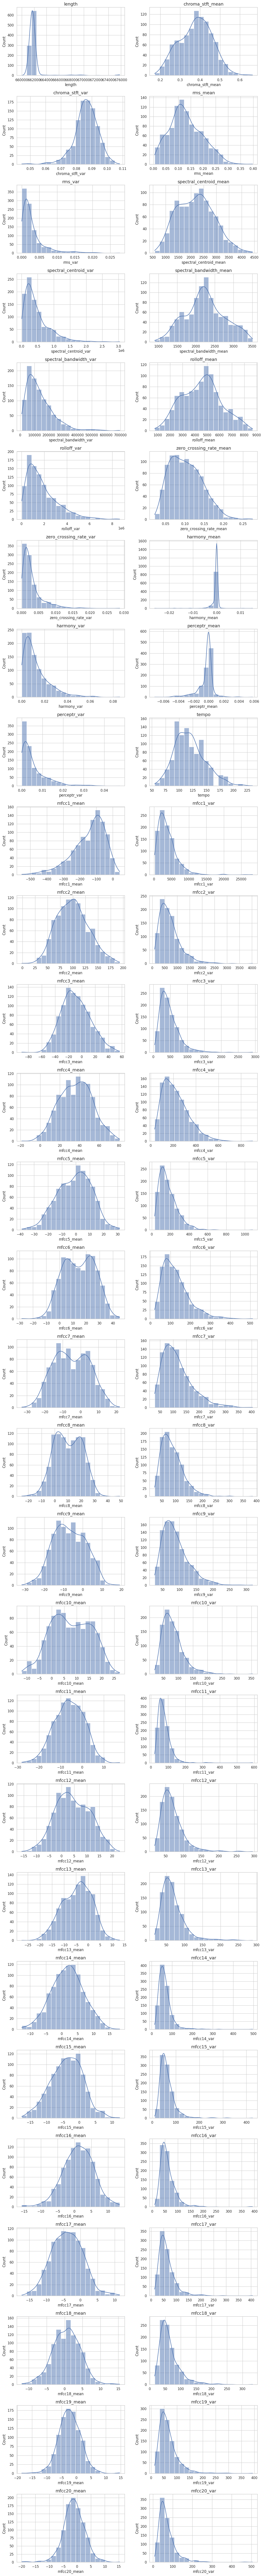

In [13]:
fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(df[col], ax=axes[i], bins=20, kde=True)
    axes[i].set_title(f'{col}', fontsize=14)

plt.tight_layout()
plt.show()


### Boxplots

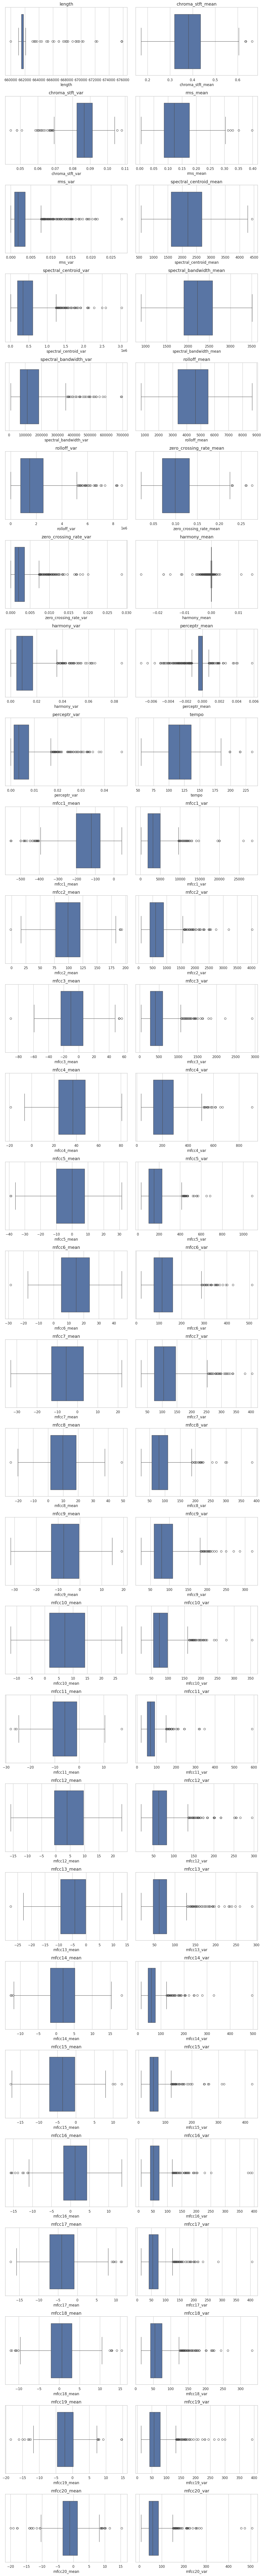

In [14]:
fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=14)

plt.tight_layout()
plt.show()

## Correlación de los datos

In [15]:
# Primero convertimos el label a númerico
from sklearn.preprocessing import LabelEncoder

# Label encoder
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

display(df['label'].unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

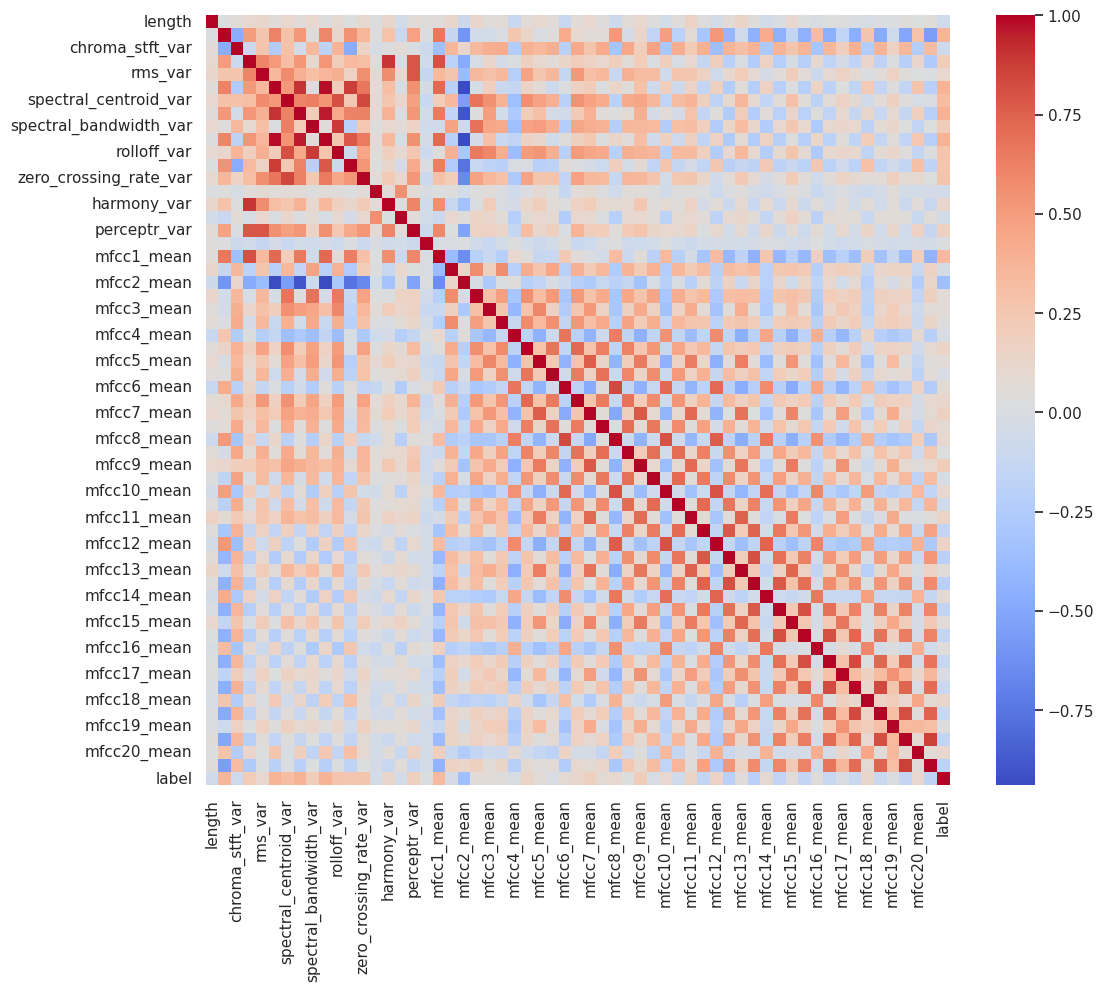

In [16]:
corr = df[1:].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

Se puede observar que hay correlación entre algunos features y el label, por ejemplo, entre el feature 'spectral_centroid' y el label.

## Red neuronal con pytorch

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [18]:
# Separamos los datos
X = df.drop('label', axis=1)
y = df['label']

In [19]:
# Escalamos los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
len(X_train), len(X_test)

(789, 198)

In [22]:
# Red neuronal con pytorch
import torch.nn as nn
import torch.nn.functional as F

device = "cuda" if torch.cuda.is_available() else "cpu"


In [23]:
# Convertimos los datos a tensores
X_train = torch.FloatTensor(X_train).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_train = torch.LongTensor(y_train.values).to(device)
y_test = torch.LongTensor(y_test.values).to(device)

In [24]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(in_features=58, out_features=128)
        self.hidden_layer = nn.Linear(in_features=128, out_features=64)
        self.output_layer = nn.Linear(in_features=64, out_features=10)

    def forward(self, x):
        Y0 = F.tanh(self.input_layer(x))
        Y1 = F.tanh(self.hidden_layer(Y0))
        Y2 = self.output_layer(Y1)
        return Y2

In [25]:
# Entrenamiento
model = NN().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

epochs = 500

for epoch in range(epochs):
    # Training
    model.train()

    # Forward pass
    y_pred = model(X_train)

    # Convert logits to class predictions
    y_pred_labels = torch.argmax(y_pred, dim=1)
      
    # Loss and Accuracy
    loss = loss_fn(y_pred, y_train)
    accuracy = accuracy_score(y_pred_labels.cpu().numpy(), y_train.cpu().numpy())

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())
    train_accuracies.append(accuracy * 100)

    # Testing
    model.eval()
    with torch.inference_mode():
        # Forward pass
        y_test_pred = model(X_test)

        # Convert logits to class predictions
        y_test_pred_labels = torch.argmax(y_test_pred, dim=1)
        
        # Loss
        test_loss = loss_fn(y_test_pred, y_test)
        test_accuracy = accuracy_score(y_test_pred_labels.cpu().numpy(), y_test.cpu().numpy())

    test_losses.append(test_loss.item())
    test_accuracies.append(test_accuracy * 100)


# Print out what's happening
    if epoch % 50 == 0:
        print(
            f"Epoch [{epoch}/{epochs}] => Loss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%"
        )

Epoch [0/500] => Loss: 2.3063, Accuracy: 14.20%, Test Loss: 2.2826, Test Accuracy: 17.68%
Epoch [50/500] => Loss: 1.3742, Accuracy: 52.72%, Test Loss: 1.5060, Test Accuracy: 41.41%
Epoch [100/500] => Loss: 1.0496, Accuracy: 65.02%, Test Loss: 1.2450, Test Accuracy: 50.51%
Epoch [150/500] => Loss: 0.8399, Accuracy: 74.90%, Test Loss: 1.1042, Test Accuracy: 56.57%
Epoch [200/500] => Loss: 0.6958, Accuracy: 78.83%, Test Loss: 1.0188, Test Accuracy: 62.63%
Epoch [250/500] => Loss: 0.5936, Accuracy: 82.51%, Test Loss: 0.9693, Test Accuracy: 62.63%
Epoch [300/500] => Loss: 0.5167, Accuracy: 84.79%, Test Loss: 0.9418, Test Accuracy: 64.65%
Epoch [350/500] => Loss: 0.4556, Accuracy: 88.47%, Test Loss: 0.9277, Test Accuracy: 64.65%
Epoch [400/500] => Loss: 0.4050, Accuracy: 90.37%, Test Loss: 0.9225, Test Accuracy: 65.66%
Epoch [450/500] => Loss: 0.3620, Accuracy: 92.14%, Test Loss: 0.9234, Test Accuracy: 65.66%


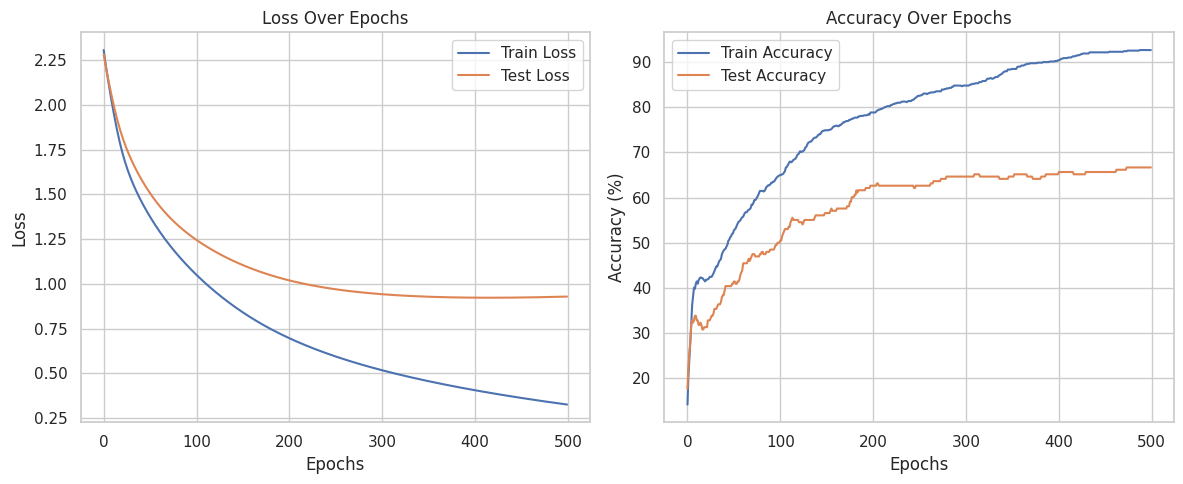

In [26]:
epochs_range = range(epochs)

plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
plt.plot(epochs_range, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
# Predicciones en el conjunto de test
with torch.no_grad():
    y_test_pred = model(X_test)
    y_test_pred_labels = torch.argmax(y_test_pred, dim=1)

# Convertir las predicciones a numpy
y_test_pred_labels = y_test_pred_labels.cpu().numpy()
y_test_true = y_test.cpu().numpy()

# Reportes
print("Classification Report:")
print(classification_report(y_test_true, y_test_pred_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.67      0.62        21
           1       0.87      0.93      0.90        14
           2       0.79      0.65      0.71        23
           3       0.65      0.46      0.54        24
           4       0.62      0.65      0.63        20
           5       0.89      0.77      0.83        22
           6       0.74      0.74      0.74        19
           7       0.72      0.93      0.81        14
           8       0.55      0.52      0.54        21
           9       0.42      0.55      0.48        20

    accuracy                           0.67       198
   macro avg       0.68      0.69      0.68       198
weighted avg       0.68      0.67      0.67       198



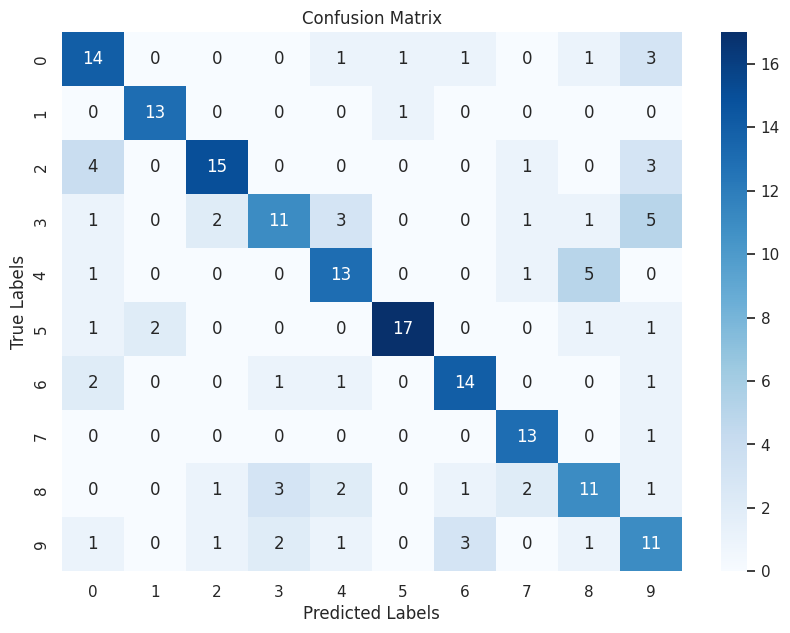

In [28]:
cm = confusion_matrix(y_test_true, y_test_pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()